<a href="https://colab.research.google.com/github/edmondcheng72/Hotel-Reservation-Classification-Model/blob/main/Hotel_Reservation_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Dependencies

In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

Import the data from a CSV file into a pandas dataframe

In [ ]:
hotels = pd.read_csv('https://raw.githubusercontent.com/edmondcheng72/Hotel-Reservation-Classification-Model/main/Hotel%20Reservations.csv')

Drop ID column

In [ ]:
hotels.drop(columns=['Booking_ID'], inplace=True)

Take a peek at our dataset

In [ ]:
hotels.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Looking at the size of our dataset

In [ ]:
hotels.shape

(36275, 18)

Checking for any missing values in the dataset

In [ ]:
hotels.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Inspecting the data types in the dataframe.

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

Variations in Booking Status

In [ ]:
print(hotels.booking_status.value_counts())

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


Variations in Type of Meal Plans

In [ ]:
print(hotels.type_of_meal_plan.value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


Variations in Room Reservation Types

In [ ]:
print(hotels.room_type_reserved.value_counts())

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


Variations in Market Segment Types

In [ ]:
print(hotels.market_segment_type.value_counts())

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


Visualizing the distribution of Booking Status

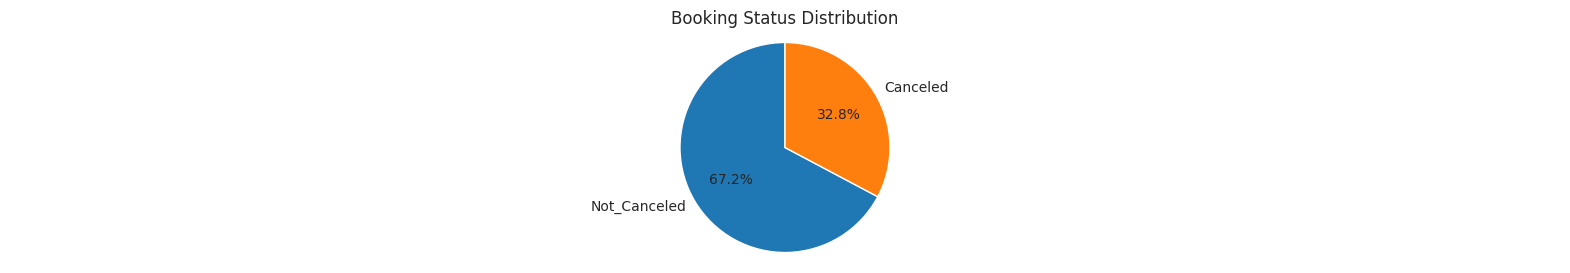

In [ ]:
#Appendix A
fig, ax = plt.subplots()
booking_status_counts = hotels['booking_status'].value_counts()
labels = booking_status_counts.index
sizes = booking_status_counts.values
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Booking Status Distribution')
plt.show()

Visualizing the frequency of Meal Plan by Booking Status

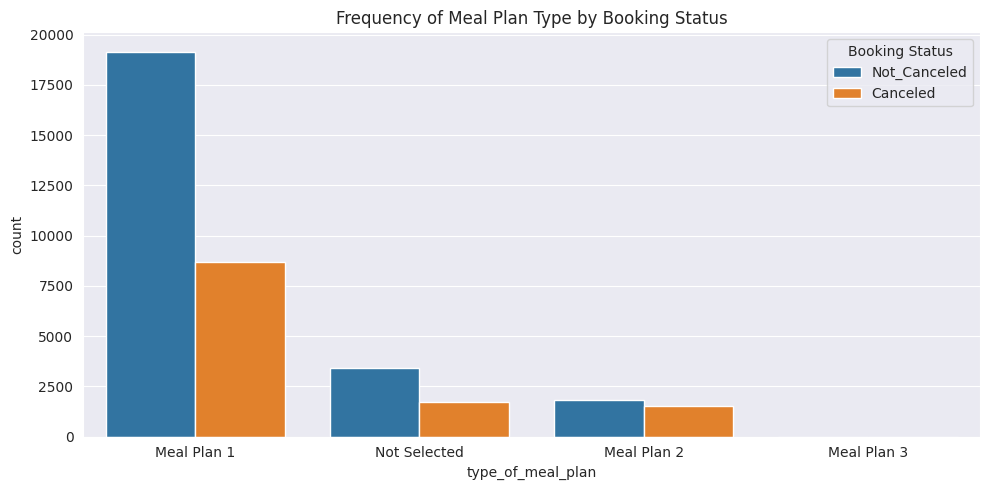

In [ ]:
#Appendix B
plt.figure(figsize=(10, 5))
sns.countplot(data=hotels, x="type_of_meal_plan", hue='booking_status')
plt.title('Frequency of Meal Plan Type by Booking Status')
plt.legend(title='Booking Status')
plt.tight_layout()
sns.set_style("darkgrid")
plt.show()

Visualizing the frequency of Room Type by Booking Status

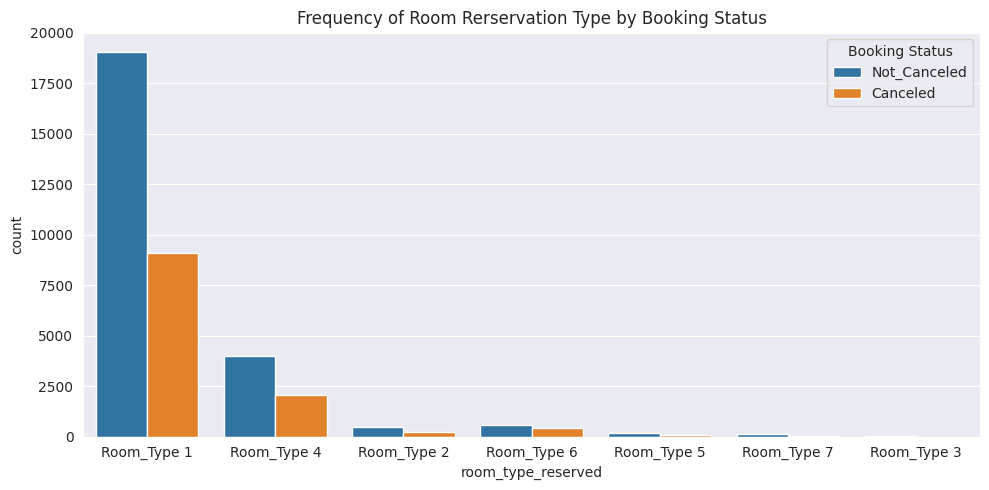

In [ ]:
#Appendix C
plt.figure(figsize=(10, 5))
sns.countplot(data=hotels, x="room_type_reserved", hue='booking_status')
plt.title('Frequency of Room Rerservation Type by Booking Status')
plt.legend(title='Booking Status')
plt.tight_layout()
sns.set_style("darkgrid")
plt.show()

Visualizing the frequency of Market Segment Type by Booking Status

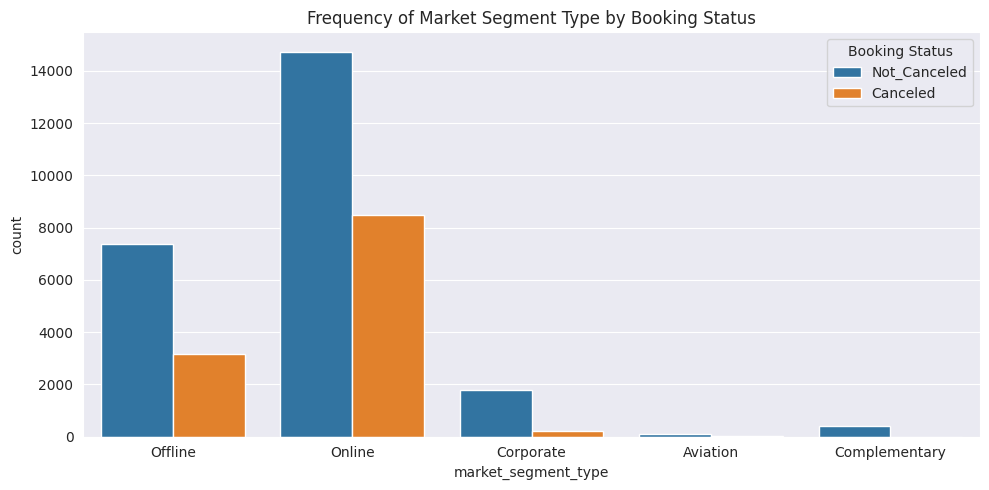

In [ ]:
#Appendix D
plt.figure(figsize=(10, 5))
sns.countplot(data=hotels, x="market_segment_type", hue='booking_status')
plt.title('Frequency of Market Segment Type by Booking Status')
plt.legend(title='Booking Status')
plt.tight_layout()
sns.set_style("darkgrid")
plt.show()

Instantiate the OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop ='first')

Encoding categorical columns

In [ ]:
#Select categorical columns for encoding
categorical_columns = ['type_of_meal_plan','room_type_reserved','market_segment_type']
hotels_categorical = hotels[categorical_columns]

#Fit and transform the data
hotels_encoded = encoder.fit_transform(hotels_categorical)

#Convert the output to a DataFrame
columns = encoder.get_feature_names_out(categorical_columns)
hotels_encoded_df = pd.DataFrame(hotels_encoded, columns=columns)

#Drop original categorical columns and join the encoded DataFrame
hotels = hotels.drop(categorical_columns, axis=1)
hotels = pd.concat([hotels, hotels_encoded_df], axis=1)

Taking a peek at the encoded dataframe

In [ ]:
hotels

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,2,0,1,3,0,228,2018,10,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,2,0,2,6,0,148,2018,7,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,2,0,0,3,0,63,2018,4,21,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Correlation Heatmap to analyze feature strength

<ipython-input-212-835ffbcc038f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hotels.corr())


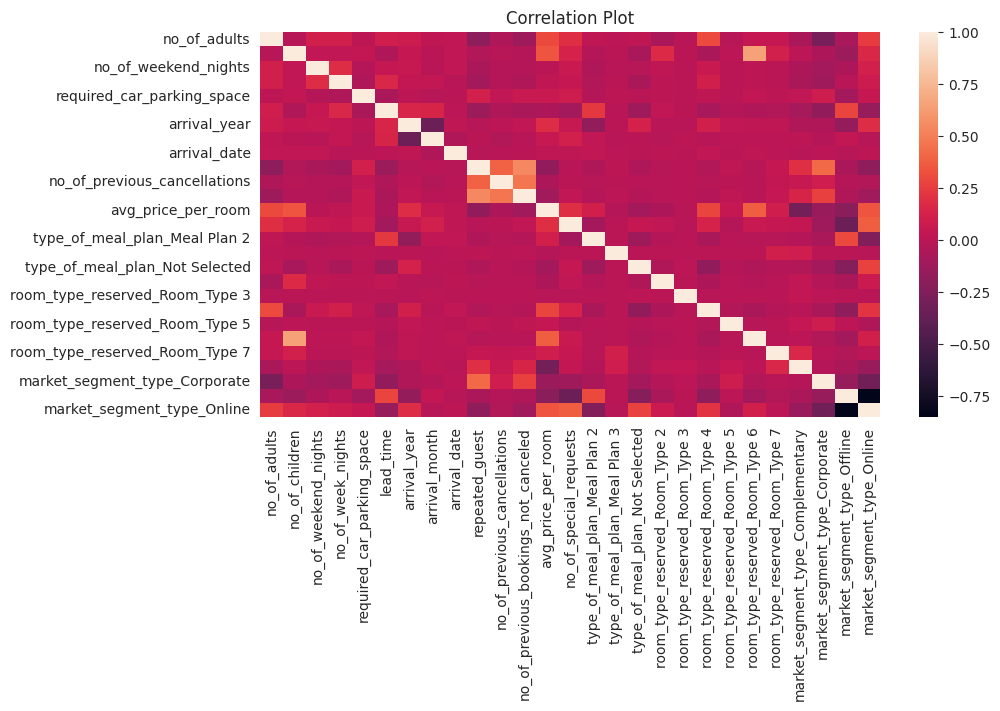

In [ ]:
#Appendix E
plt.figure(figsize=(10, 5))
sns.heatmap(hotels.corr())
plt.title('Correlation Plot')
plt.show()

Seperating the features from the labels

In [ ]:
hotels.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [ ]:
X = hotels[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online']].values

In [ ]:
y = hotels[['booking_status']].values

In [ ]:
hotels.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

Splitting the Dataset into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Feature scaling the data to standardize it such that the mean value is 0 and the standard deviation is 1.

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting the models to the training dataset

In [ ]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=1)
rf.fit(X_train, y_train.ravel())

#Support Vector Machine
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

Performing 5-Fold Cross Validation and Obtaining Average Accuracy for model

In [ ]:
k = 5
kf = KFold(n_splits=k)

gnb_result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
dt_result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
rf_result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
svm_result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
knn_result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f'Naive Bayes Avg Accuracy:{gnb_result.mean()}')
print(f'Decision Tree Avg Accuracy:{dt_result.mean()}')
print(f'Random Forest Avg Accuracy:{rf_result.mean()}')
print(f'Support Vector Machine Avg Accuracy:{svm_result.mean()}')
print(f'K-Nearest Neighbors Avg Accuracy:{knn_result.mean()}')

Naive Bayes Avg Accuracy:0.40225253131285826
Decision Tree Avg Accuracy:0.8640124318555324
Random Forest Avg Accuracy:0.888429687658121
Support Vector Machine Avg Accuracy:0.803993910782306
K-Nearest Neighbors Avg Accuracy:0.8439667510909358


Visualizing the Average Accuracy in a bargraph

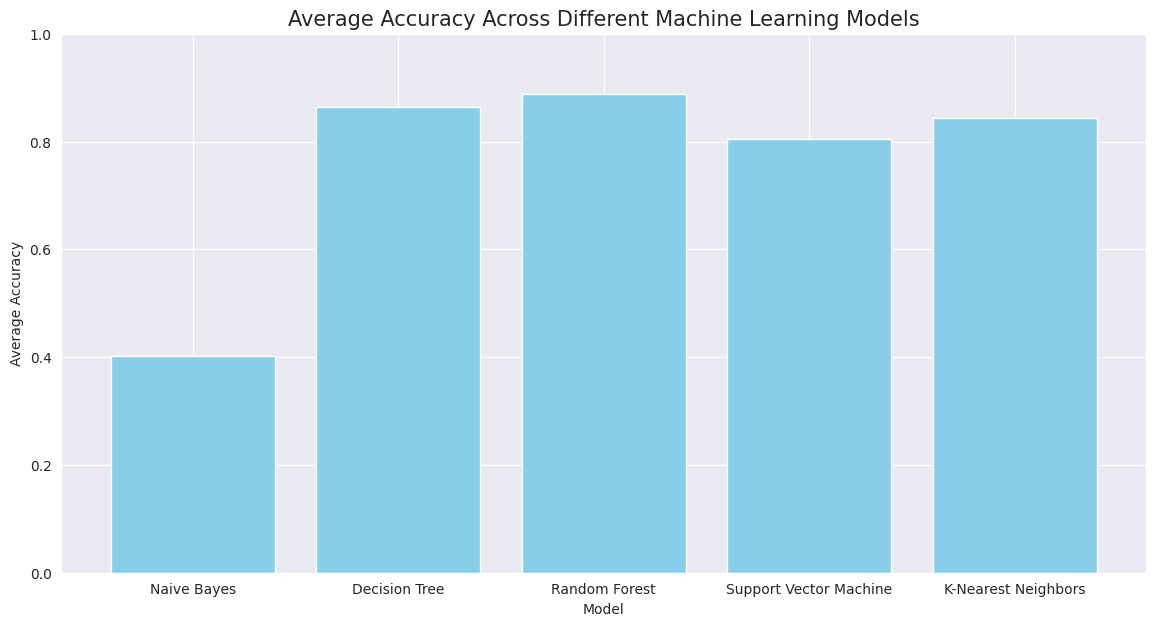

In [ ]:
#Appendix F
models = ['Naive Bayes','Decision Tree','Random Forest','Support Vector Machine','K-Nearest Neighbors']
avg_accuracies = [0.40225253131285826, 0.8642488539291093, 0.888429687658121, 0.803993910782306, 0.8439667510909358]

plt.figure(figsize=(14,7))
plt.bar(models, avg_accuracies, color ='skyblue')
plt.title('Average Accuracy Across Different Machine Learning Models', fontsize=15)
plt.ylabel('Average Accuracy', fontsize=10)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.xlabel('Model', fontsize=10)
sns.set_style("darkgrid")
plt.show()

Make predictions using your test data (X_test) on each model.

In [ ]:
y_pred_gnb = gnb.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_linear = linear.predict(X_test)
y_pred_knn = knn.predict(X_test)

Printing the classification reports for each model

In [ ]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

    Canceled       0.35      0.96      0.52      3574
Not_Canceled       0.88      0.14      0.24      7309

    accuracy                           0.41     10883
   macro avg       0.61      0.55      0.38     10883
weighted avg       0.70      0.41      0.33     10883



In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

    Canceled       0.79      0.80      0.80      3574
Not_Canceled       0.90      0.90      0.90      7309

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    Canceled       0.85      0.82      0.83      3574
Not_Canceled       0.91      0.93      0.92      7309

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



In [ ]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

    Canceled       0.74      0.61      0.67      3574
Not_Canceled       0.82      0.90      0.86      7309

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.79     10883



In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

    Canceled       0.79      0.74      0.76      3574
Not_Canceled       0.88      0.90      0.89      7309

    accuracy                           0.85     10883
   macro avg       0.83      0.82      0.82     10883
weighted avg       0.85      0.85      0.85     10883



Generating graph based on accuracy and weighted avg for precision, recall, and F1 scores for each machine learning model.


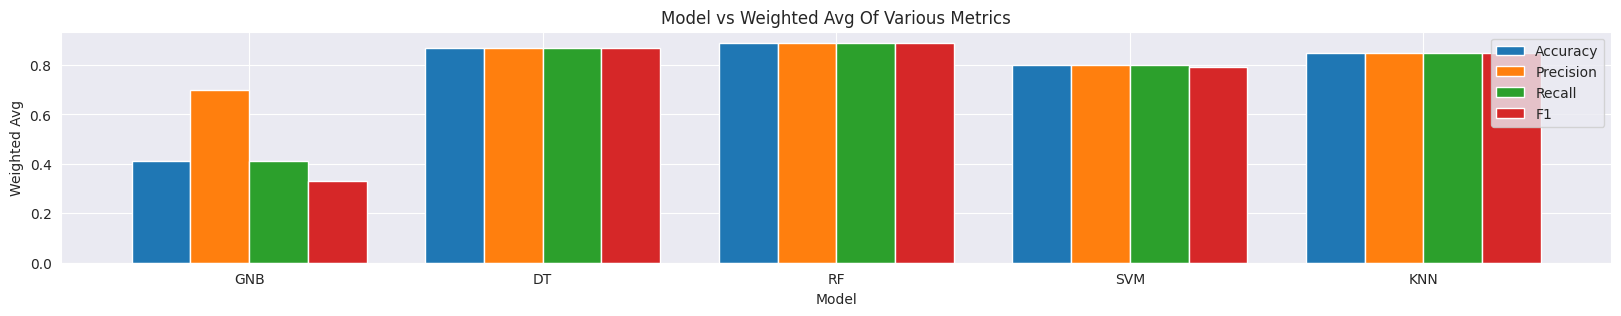

In [ ]:
#Appendix G
#Models
X = ['GNB','DT','RF','SVM','KNN']

# Collect this information from the classification reports and store them in lists
accuracy = [0.41, 0.87, 0.89, 0.8, 0.85]
precision = [0.70, 0.87, 0.89, 0.8, 0.85]
recall = [0.41, 0.87, 0.89, 0.8, 0.85]
f1 = [0.33, 0.87, 0.89, 0.79, 0.85]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()

Export the most accurate model and scaler to pickle files

In [ ]:
with open('rf_model.pkl', 'wb') as f:
  pickle.dump(rf, f)
with open('hotel_scaler.pkl', 'wb') as f:
  pickle.dump(sc, f)